# **Project: Student Performance Predictor**
     G1, G2, G3 are the grades at different periods:
     G1 = grade in 1st period, G2 = grade in 2nd period, G3 = final grade.
     G3 is our target column

Name: Laiba Nasir

Roll No: 22F-BSAI-18

In [1]:
# Importing the Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score

In [3]:
# Load the student performance dataset
# this dataset is about student performance in maths subject that how well he has performed in maths subject
# we have use ; because this dataset is separted by semicolon
df = pd.read_csv("student-mat.csv", sep = ';')
print(df.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [4]:
# Data Preprocessing
print(df.shape) # this dataset has 395 rows with 33 columns

(395, 33)


In [5]:
print(df.info)

<bound method DataFrame.info of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel fre

In [6]:
print("Missing Values", df.isnull().sum()) # to check that dataset has any missing values or not. This dataset has no misssing or null values

Missing Values school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


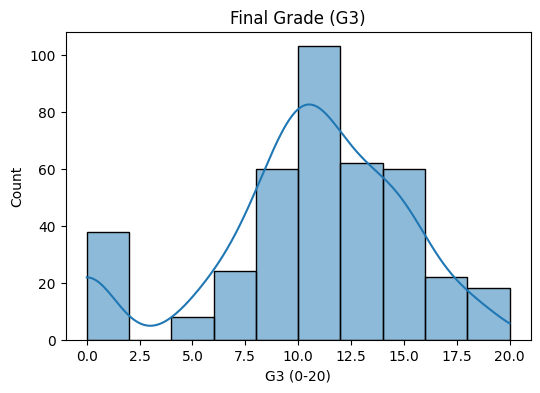

In [7]:
# EDA
# It will show distribution of G3 our final grade so we see if final grades are
# skewed or not. This will help also to check that linear regression performs well
plt.figure(figsize=(6,4))
sns.histplot(df['G3'], bins=10, kde=True)
plt.title("Final Grade (G3)")
plt.xlabel("G3 (0-20)")
plt.ylabel("Count")
plt.show()

In [8]:
# Encode categorical columns
# Many columns are categorical like sex, school, Mjob
# Model need numeric input. we use LabelEncoder gives integer numbers
le = LabelEncoder()
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("Categorical columns :", categorical_cols)
for col in categorical_cols:
   df[col] = le.fit_transform(df[col])
# to check after encoding
print(df.head())

Categorical columns : ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
   school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0       0    0   18        1        0        0     4     4     0     4  ...   
1       0    0   17        1        0        1     1     1     0     2  ...   
2       0    0   15        1        1        1     1     1     0     2  ...   
3       0    0   15        1        0        1     4     2     1     3  ...   
4       0    0   16        1        0        1     3     3     2     2  ...   

   famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  G3  
0       4         3      4     1     1       3         6   5   6   6  
1       5         3      3     1     1       3         4   5   5   6  
2       4         3      2     2     3       3        10   7   8  10  
3       3         2      2     1     1  

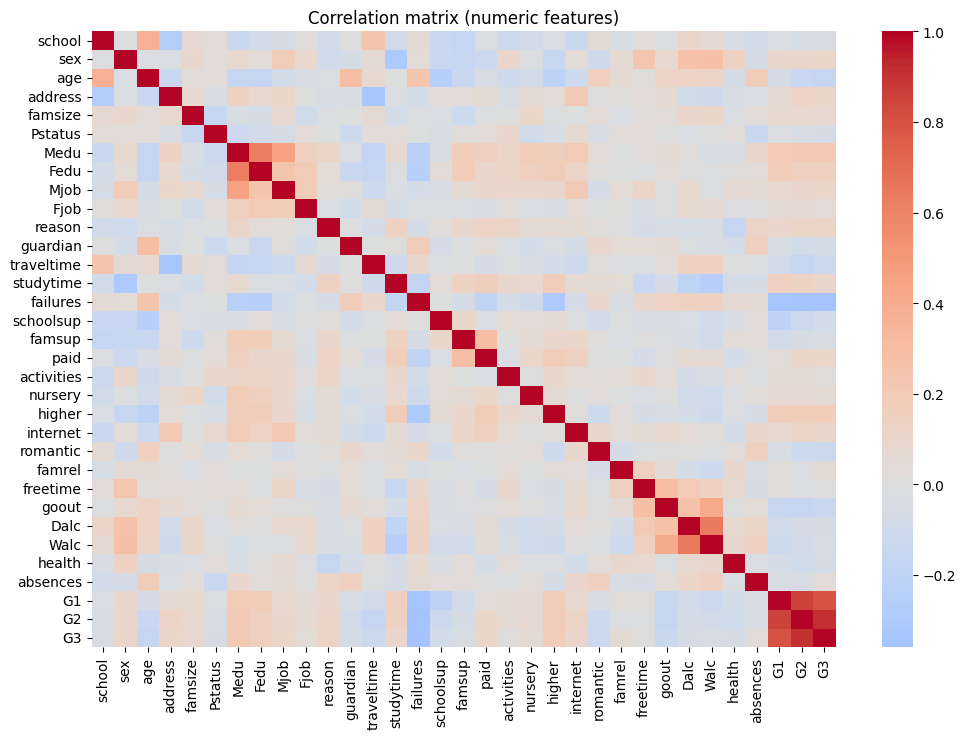

In [9]:
# Correlation help to understand which features relations with one another.
plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False)
plt.title("Correlation matrix (numeric features)")
plt.show()

# We keep all columns
# We do not drop G1/G2 as it strongly predict G3 because increase accuracy.
# we didn't remove some columns like (studytime, absences, failures) like all
# important and we cant give away any information.

In [10]:
# In X contain all columns and Y has target column
X = df.drop('G3', axis=1)
y = df['G3']

# Split to train/test we do this as we take 70 percent for training and 20
# for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Scaling We scale features because linear regression need scaling to converge faster
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [12]:
# Linear Regression
lin = LinearRegression()
lin.fit(X_train_scaled, y_train)

# Predict and evaluate using R^2
y_pred_lin = lin.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred_lin)

print("Linear Regression Results:")
print("R² Result", round(r2, 3))

Linear Regression Results:
R² Result 0.755


In [13]:
# Convert to classification
# We create a pass/fail target columns beacuse logistics classification uses binary outcome
df['Pass_Fail'] = np.where(df['G3'] >= 10, 1, 0)

Xc = df.drop(['G3', 'Pass_Fail'], axis=1)
yc = df['Pass_Fail']

# Again Split and scale
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.2, random_state=42)
Xc_train_scaled = scaler.fit_transform(Xc_train)
Xc_test_scaled = scaler.transform(Xc_test)



In [15]:
log = LogisticRegression(max_iter=1000)
log.fit(Xc_train_scaled, yc_train)
yc_pred_log = log.predict(Xc_test_scaled)
# we have use logistic and decision both to compare result here max iteration means that do max iteration to get better result

In [16]:
# Decision Tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(Xc_train_scaled, yc_train)
yc_pred_tree = tree.predict(Xc_test_scaled)

In [27]:
# We compute accuracy, precision, recall, F1 for each model.
from sklearn.metrics import confusion_matrix
def print_classification_results(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    print("accuracy", acc)
    print("Precision:",prec)
    print("Recall:",rec)
    print("F1 score:",f1)
    print("Confusion Matrix:\n", cm)
print("Logistic Regression Results:")
print_classification_results(yc_test, yc_pred_log)
print("\nDecision Tree Results:")
print_classification_results(yc_test, yc_pred_tree)

Logistic Regression Results:
accuracy 0.9367088607594937
Precision: 0.9607843137254902
Recall: 0.9423076923076923
F1 score: 0.9514563106796117
Confusion Matrix:
 [[25  2]
 [ 3 49]]

Decision Tree Results:
accuracy 0.8860759493670886
Precision: 0.9215686274509803
Recall: 0.9038461538461539
F1 score: 0.912621359223301
Confusion Matrix:
 [[23  4]
 [ 5 47]]


**Linear Regression:**

* R² = **0.755**  it’s a **good fit**, showing our selected features can explain most of the students’ performance.

**Logistic Regression:**

* Accuracy = 93.7% model predicted correctly most of the students.
* Precision = 96% among all students predicted as *Pass*, 96% actually passed this support False positive.
* Recall = 94%  model was able to find 94% of all real *Pass* students it support False negative.
* F1 = 95%** :  balance between precision and recall.

**Decision Tree:**

* Accuracy = 88.6% compared to logistics perform slightly low
* Precision = 92%**, Recall = 90%, F1 = 91% still a strong model but less  than logistic regression.
Decision Tree is **good**, but may overfit  compared to Logistic Regression.


 Linear regression works well for predicting marks.
 Logistic regression gives the **best accuracy** for pass/fail classification.
 Decision tree also works fine but with a bit lower accuracy.
